# **Assignment 10**

Victor H Torres

In [1]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

#plotly or other graphing library
import seaborn as sns

In [2]:
# Load datasets here once and assign to variables iris and boston
#iris = 
iris = pd.read_csv("C:/Users/vitug/Downloads/archive/Iris.csv")
iris


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# Load datasets here once and assign to variables iris and boston
#boston = 
boston_columns = ["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "b", "lstat", "medv"]
data_url = "http://lib.stat.cmu.edu/datasets/boston"
df = pd.read_fwf(data_url, widths=[1000], skiprows=22, header=None)

all_data = []
for i in range(0, len(df), 2):
    combined_line = df.iloc[i, 0].strip() + " " + df.iloc[i+1, 0].strip()
    all_data.append(combined_line.split())

boston= pd.DataFrame(all_data, columns=boston_columns)
boston = boston.astype(float)
boston



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


**Q1** 

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [4]:
# Rename columns using .rename function and displaying first 5 rows results using .head function.
iris.rename(columns = {'SepalLengthCm':'sepallength', 'SepalWidthCm':'sepalwidth', 'PetalLengthCm':'petallength', 'PetalWidthCm':'petalwidth'}, inplace = True)
iris.head()
 

,Id,sepallength,sepalwidth,petallength,petalwidth,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Target X and y as target for analysis.
X= iris[['petallength','petalwidth']]
y= iris['Species']
X , y

(     petallength  petalwidth
 0            1.4         0.2
 1            1.4         0.2
 2            1.3         0.2
 3            1.5         0.2
 4            1.4         0.2
 ..           ...         ...
 145          5.2         2.3
 146          5.0         1.9
 147          5.2         2.0
 148          5.4         2.3
 149          5.1         1.8
 
 [150 rows x 2 columns],
 0         Iris-setosa
 1         Iris-setosa
 2         Iris-setosa
 3         Iris-setosa
 4         Iris-setosa
             ...      
 145    Iris-virginica
 146    Iris-virginica
 147    Iris-virginica
 148    Iris-virginica
 149    Iris-virginica
 Name: Species, Length: 150, dtype: object)

**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in 
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [8]:
#Split data into training test
x_train, x_test, y_train, y_test= tts(X, y, test_size= 0.5,
random_state= 45)


In [9]:
#Fit the data
knn = KNN(n_neighbors=5, weights='distance')
knn_model = knn.fit(x_train, y_train)

In [10]:
knn_model.score(x_test,y_test)

0.96

In [12]:
y_pred = knn_model.predict(x_test)
accuracy = (y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: (0          Iris-setosa
43         Iris-setosa
129     Iris-virginica
3          Iris-setosa
34         Iris-setosa
            ...       
50     Iris-versicolor
135     Iris-virginica
80     Iris-versicolor
73     Iris-versicolor
97     Iris-versicolor
Name: Species, Length: 75, dtype: object, array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris

**Q3** 15 pts

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [65]:

X = iris.drop('petallength', axis=1)
y = iris['Species']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)


In [66]:
knn = KNN(n_neighbors=2)
knn_model= knn.fit(X_train, y_train)
knn_model.score(X_test,y_test)
y_pred = knn_model.predict(X_test)
accuracy = (y_test, y_pred)
print("Accuracy:", accuracy)

ValueError: could not convert string to float: 'Iris-setosa'

**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

**Q5** 10 pts

**Data set: Boston**


* Load sklearn's Boston data into a DataFrame (only the data and feature_name as column names)

* Load sklearn's Boston target values into a separate DataFrame

* Return back the average of AGE, average of the target (median value of homes or MEDV), and the target as NumPy values 

In [24]:

# Convert the Boston dataset to a pandas dataframe
boston= pd.DataFrame(all_data, columns=boston_columns)
boston = boston.astype(float)
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [29]:
# Declare X and y as target variables.
X= boston[['crim','age']]
y= boston['medv']
X , y

(        crim   age
 0    0.00632  65.2
 1    0.02731  78.9
 2    0.02729  61.1
 3    0.03237  45.8
 4    0.06905  54.2
 ..       ...   ...
 501  0.06263  69.1
 502  0.04527  76.7
 503  0.06076  91.0
 504  0.10959  89.3
 505  0.04741  80.8
 
 [506 rows x 2 columns],
 0      24.0
 1      21.6
 2      34.7
 3      33.4
 4      36.2
        ... 
 501    22.4
 502    20.6
 503    23.9
 504    22.0
 505    11.9
 Name: medv, Length: 506, dtype: float64)

In [38]:
# I used the np.mean to obtain the average of each columm
ave=np.mean(X, axis=0)
ave1=np.mean(y, axis=0)
print(ave)
print(ave1)

crim     3.613524
age     68.574901
dtype: float64
22.532806324110698


**Q6** 

**Data set: Boston**

* In the Boston dataset, the feature PTRATIO refers to pupil teacher ratio.

* Using a matplotlib scatter plot, plot MEDV median value of homes as y-axis and PTRATIO as x-axis

* Return back PTRATIO as a NumPy array

19.05
21.2


<AxesSubplot:xlabel='ptratio', ylabel='medv'>

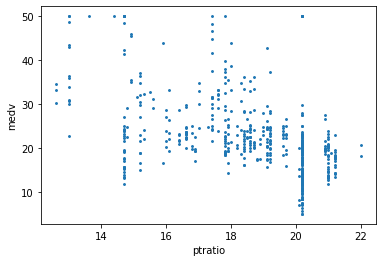

In [51]:
# obtain the median of 'ptratio' and 'medv' using .median and plot it
p_median = boston['ptratio'].median()
m_median = boston['medv'].median()
print(p_median)
print(m_median)
boston.plot.scatter(x = 'ptratio', y = 'medv', s =3.5)


**Q7**

**Data set: Boston**

* Create a regression model for MEDV / PTRATIO and display a chart showing the regression line using matplotlib


* Use np.linspace() to generate prediction X values from min to max PTRATIO

* Return back the regression prediction space and regression predicted values

* Make sure to labels axes appropriately

In [52]:
X= boston[['medv']]
y= boston['ptratio']
X
y

0      15.3
1      17.8
2      17.8
3      18.7
4      18.7
       ... 
501    21.0
502    21.0
503    21.0
504    21.0
505    21.0
Name: ptratio, Length: 506, dtype: float64

In [54]:
regr = lm.LinearRegression()
regr.fit(X, y)

LinearRegression()

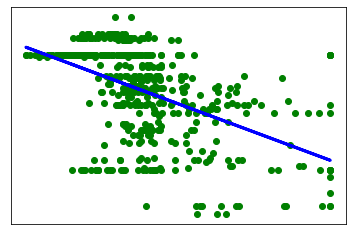

In [58]:
plt.scatter(X, y,  color='Green')
plt.plot(X, regr.predict(X), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()